In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
# from print_result import benchmarks, extract_result_fn_dict, metrics
from pathlib import Path
import json
import seaborn as sns

In [2]:
benchmarks = [
    'arc',
    'gsm8k',
    'hellaswag',
    'mmlu',
    'truthful',
    'winograde'
]


metrics = {
    'arc': 'acc_norm,none',
    'gsm8k': 'exact_match,strict-match',
    'hellaswag': 'acc_norm,none',
    'mmlu': 'acc,none',
    'truthful': 'acc,none',
    'winograde': 'acc,none'
}

extract_result_fn_dict = {
    'arc': lambda js_data: js_data['results']['arc_challenge'][metrics['arc']],
    'gsm8k': lambda js_data: js_data['results']['gsm8k'][metrics['gsm8k']],
    'hellaswag': lambda js_data: js_data['results']['hellaswag'][metrics['hellaswag']],
    'mmlu': lambda js_data: js_data['results']['mmlu'][metrics['mmlu']],
    'truthful': lambda js_data: js_data['results']['truthfulqa_mc2'][metrics['truthful']],
    'winograde': lambda js_data: js_data['results']['winogrande'][metrics['winograde']],
}   

In [3]:
def get_all_results(eval_outdir):
    eval_results = []
    for b in benchmarks:
        bench_path = eval_outdir / b
        with open(bench_path / 'results.json', 'r') as f:
            bench_result = json.load(f)
        print(f"{b} | {metrics[b]} | {extract_result_fn_dict[b](bench_result)}")
        eval_results.append(extract_result_fn_dict[b](bench_result))
    return eval_results

In [4]:
eval_outdir = Path("/home/ubuntu/hieu.nn/lm-evaluation-harness/eval_outputs/stablelm-2-1_6b")
all_results_pretrain = get_all_results(eval_outdir)
all_results_pretrain.insert(0, "pretrain")

arc | acc_norm,none | 0.4334470989761092
gsm8k | exact_match,strict-match | 0.18953752843062927
hellaswag | acc_norm,none | 0.7050388368850826
mmlu | acc,none | 0.37501780373166216
truthful | acc,none | 0.3894225772541875
winograde | acc,none | 0.6677190213101816


In [5]:
eval_outdir = Path("/home/ubuntu/hieu.nn/Lang/alignment-handbook/eval_outputs/stablelm-2-1_6b-sft-full-2")
all_results_sft = get_all_results(eval_outdir)
all_results_sft.insert(0, "sft")

arc | acc_norm,none | 0.4274744027303754
gsm8k | exact_match,strict-match | 0.14480667172100076
hellaswag | acc_norm,none | 0.7040430193188608
mmlu | acc,none | 0.3773678963110668
truthful | acc,none | 0.40155739399901097
winograde | acc,none | 0.6448303078137332


In [6]:
eval_outdir = Path("/home/ubuntu/hieu.nn/Lang/alignment-handbook/eval_outputs/stablelm-2-1_6b-dpo-full")
all_results_dpo = get_all_results(eval_outdir)
all_results_dpo.insert(0, "dpo")

arc | acc_norm,none | 0.447098976109215
gsm8k | exact_match,strict-match | 0.16376042456406367
hellaswag | acc_norm,none | 0.714299940250946
mmlu | acc,none | 0.3854151830223615
truthful | acc,none | 0.41847462076295444
winograde | acc,none | 0.6527229676400947


In [7]:
eval_outdir = Path("/home/ubuntu/hieu.nn/Lang/alignment-handbook/eval_outputs/stablelm-2-1_6b-spin-dpo-0-full")
all_results_spin_dpo_0 = get_all_results(eval_outdir)
all_results_spin_dpo_0.insert(0, "spin-dpo-0")

arc | acc_norm,none | 0.447098976109215
gsm8k | exact_match,strict-match | 0.15693707354056102
hellaswag | acc_norm,none | 0.7139016132244573
mmlu | acc,none | 0.3834923800028486
truthful | acc,none | 0.4169889609268836
winograde | acc,none | 0.6574585635359116


In [8]:
eval_outdir = Path("/home/ubuntu/hieu.nn/Lang/alignment-handbook/eval_outputs/stablelm-2-1_6b-spin-dpo-1-full")
all_results_spin_dpo_1 = get_all_results(eval_outdir)
all_results_spin_dpo_1.insert(0, "spin-dpo-1")

arc | acc_norm,none | 0.44283276450511944
gsm8k | exact_match,strict-match | 0.14404852160727824
hellaswag | acc_norm,none | 0.7115116510655248
mmlu | acc,none | 0.38384845463609174
truthful | acc,none | 0.4130343237897026
winograde | acc,none | 0.6558800315706393


In [9]:
eval_outdir = Path("/home/ubuntu/hieu.nn/Lang/alignment-handbook/eval_outputs/stablelm-2-1_6b-spin-dpo-2-full")
all_results_spin_dpo_2 = get_all_results(eval_outdir)
all_results_spin_dpo_2.insert(0, "spin-dpo-2")

arc | acc_norm,none | 0.4402730375426621
gsm8k | exact_match,strict-match | 0.15466262319939347
hellaswag | acc_norm,none | 0.7115116510655248
mmlu | acc,none | 0.3871243412619285
truthful | acc,none | 0.40986914681915776
winograde | acc,none | 0.659037095501184


In [10]:
eval_outdir = Path("/home/ubuntu/hieu.nn/Lang/alignment-handbook/eval_outputs/stablelm-2-1_6b-spin-dpo-3-full")
all_results_spin_dpo_3 = get_all_results(eval_outdir)
all_results_spin_dpo_3.insert(0, "spin-dpo-3")

arc | acc_norm,none | 0.44283276450511944
gsm8k | exact_match,strict-match | 0.1508718726307809
hellaswag | acc_norm,none | 0.7098187612029476
mmlu | acc,none | 0.3844893889759294
truthful | acc,none | 0.4084105986486829
winograde | acc,none | 0.65982636148382


In [11]:
df = pd.DataFrame(data=[all_results_pretrain, all_results_sft, 
                        # all_results_dpo, 
                        all_results_spin_dpo_0, 
                        all_results_spin_dpo_1,
                        all_results_spin_dpo_2,
                        all_results_spin_dpo_3,
                        ], columns=["model", *benchmarks])
df['average'] = df[benchmarks].mean(axis=1)
df

,model,arc,gsm8k,hellaswag,mmlu,truthful,winograde,average
0,pretrain,0.433447,0.189538,0.705039,0.375018,0.389423,0.667719,0.460030
1,sft,0.427474,0.144807,0.704043,0.377368,0.401557,0.644830,0.450013
2,spin-dpo-0,0.447099,0.156937,0.713902,0.383492,0.416989,0.657459,0.462646
3,spin-dpo-1,0.442833,0.144049,0.711512,0.383848,0.413034,0.655880,0.458526
4,spin-dpo-2,0.440273,0.154663,0.711512,0.387124,0.409869,0.659037,0.460413
5,spin-dpo-3,0.442833,0.150872,0.709819,0.384489,0.408411,0.659826,0.459375


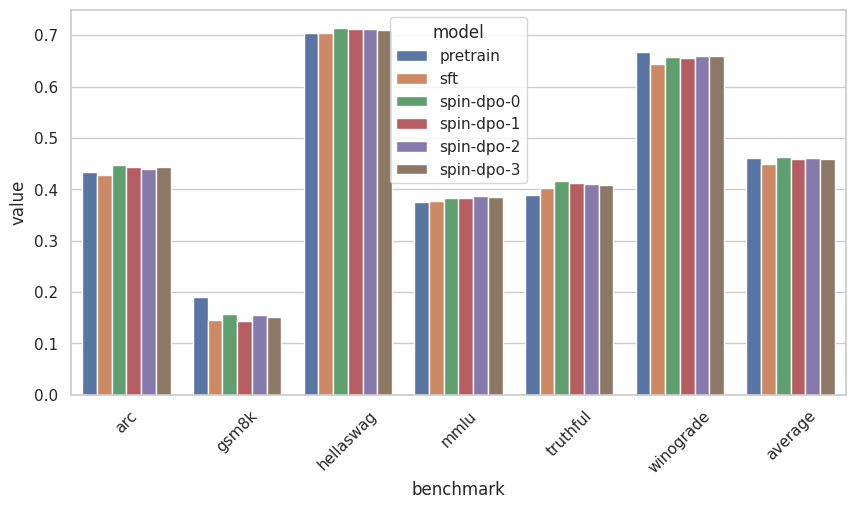

In [12]:
sns.set_theme(style="whitegrid")
plt.figure(figsize=(10, 5))
df = df.melt('model', var_name='benchmark', value_name='value')
ax = sns.barplot(x='benchmark', y='value', hue='model', data=df)
plt.xticks(rotation=45)
plt.show()


In [13]:
import yaml

In [16]:
# open file /home/ubuntu/hieu.nn/Lang/alignment-handbook/recipes/stablelm-2-1_6b/spin-dpo/config_full_0.yaml
with open('/home/ubuntu/hieu.nn/Lang/alignment-handbook/recipes/stablelm-2-1_6b/spin-dpo/config_full_0.yaml', 'r') as f:
    a = yaml.safe_load(f)

In [18]:
a

{'model_name_or_path': '/home/ubuntu/hieu.nn/Lang/alignment-handbook/data/stablelm-2-1_6b-dpo-full',
 'torch_dtype': None,
 'dataset_mixer': {'/home/ubuntu/hieu.nn/Lang/SPIN/data/sft/ultrachat_200k_generated/0_5000': 1.0},
 'dataset_splits': ['train', 'test'],
 'preprocessing_num_workers': 12,
 'bf16': True,
 'beta': 0.01,
 'do_eval': False,
 'evaluation_strategy': 'no',
 'eval_steps': 100,
 'gradient_accumulation_steps': 10,
 'gradient_checkpointing': True,
 'gradient_checkpointing_kwargs': {'use_reentrant': False},
 'hub_model_id': 'stablelm-2-1_6b-spin-dpo-0-full',
 'learning_rate': 5e-07,
 'log_level': 'info',
 'logging_steps': 10,
 'lr_scheduler_type': 'cosine',
 'max_length': 1024,
 'max_prompt_length': 512,
 'num_train_epochs': 1,
 'optim': 'adamw_torch',
 'output_dir': 'data/stablelm-2-1_6b-spin-dpo-0-full',
 'per_device_train_batch_size': 1,
 'per_device_eval_batch_size': 8,
 'push_to_hub': True,
 'save_strategy': 'steps',
 'save_steps': 100,
 'save_total_limit': 1,
 'seed': 4

In [33]:
def generate_spin_config(template, base_model, generated_dataset_path, iteration, loss_type):
    with open(template, 'r') as f:
        a = yaml.safe_load(f)
    model_name = base_model.split("/")[-1]
    if iteration > 0:
        a['model_name_or_path'] = str(Path(base_model) / "spin" / f"iter{iteration - 1}")
        a['dataset_mixer'] = {
            str(Path(f'/home/ubuntu/hieu.nn/Lang/SPIN/data/sft/ultrachat_200k_generated/{iteration - 1}_5000')): 1.0,
            str(Path(f'/home/ubuntu/hieu.nn/Lang/SPIN/data/sft/ultrachat_200k_generated/{iteration}_5000')): 1.0
        }
    elif iteration == 0:
        a['model_name_or_path'] = str(Path(base_model))
        a['dataset_mixer'] = {
            generated_dataset_path: 1.0
        }
    a['hub_model_id'] = f"{model_name}-spin-{loss_type}-iter{iteration}"
    a['output_dir'] = f"data/{model_name}-spin-{loss_type}-iter{iteration}"
    a['precompute_ref_log_probs_path'] = str(Path(a['output_dir']) / 'ref_logprobs.pkl')
    a['loss_type'] = loss_type
    return a
    

In [35]:
a = generate_spin_config('recipes/stablelm-2-1_6b/spin-dpo/config_full_0.yaml', '/home/ubuntu/hieu.nn/Lang/alignment-handbook/data/stablelm-2-1_6b-sft-full', '/home/ubuntu/hieu.nn/Lang/SPIN/data/sft/ultrachat_200k_generated/0_5000', 2, "sigmoid")

In [37]:
with open("tmp.yml", 'w') as f:
    yaml.safe_dump(a, f)